In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Wine_clust.csv")

# EDA

In [70]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [71]:
df.shape

(178, 13)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [73]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


# K-Means Clustering

K-Means requires unlabeled data in order to run. 

So, taking data without labels to perform K-means clustering.

In [78]:
X=scaled_df.values

In [79]:
from sklearn.cluster import KMeans

In [80]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


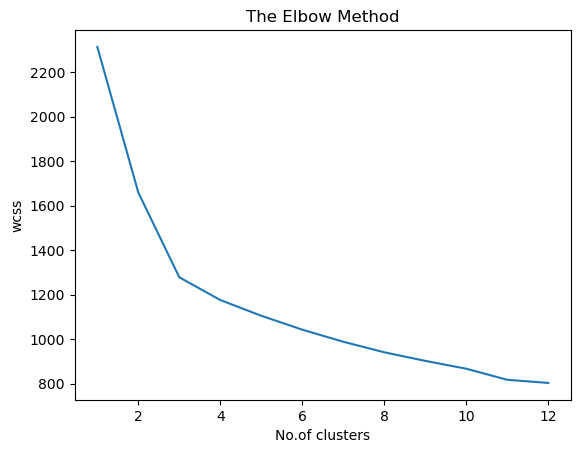

In [81]:
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('wcss')
plt.show()

As we can see from the above graph that there is turning like an elbow at k=3. So, we can say that the right number of cluster for the given datasets is 3.

In [82]:
kmeans=KMeans(n_clusters=3, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [83]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
sil_ahc= silhouette_score(X,y_kmeans)

In [86]:
sil_ahc

0.2848589191898987

# Agglomerative Hierarchical Clustering

In [87]:
import scipy.cluster.hierarchy as sch

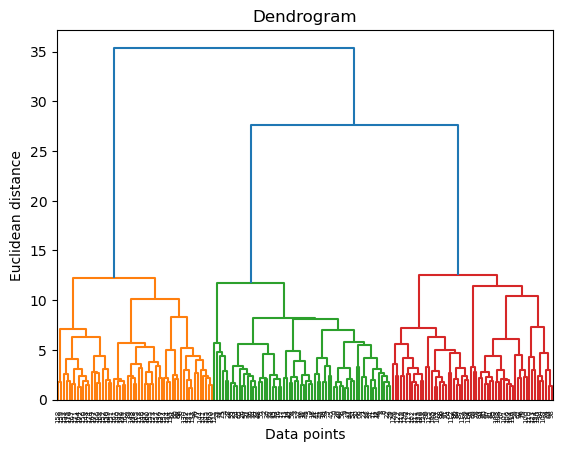

In [88]:
dendrogram=sch.dendrogram(sch.linkage(X,method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

from dendrogram we got number of clusters=3

In [91]:
from sklearn.cluster import AgglomerativeClustering
ahc=AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', linkage='ward')
y_ahc=ahc.fit_predict(X)

In [92]:
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [93]:
from sklearn.metrics import silhouette_score
sil_ahc= silhouette_score(X,y_ahc)

In [94]:
sil_ahc

0.2774439826952265

# DB Scan Clustering

In [95]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [45]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [46]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [47]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [48]:
print(labels)

[-1  0 -1  0 -1 -1 -1  2 -1 -1  1 -1  2 -1 -1  2  2  3  1 -1 -1  3  2  1
  1 -1  3  2 -1 -1 -1  0 -1 -1  0 -1  0 -1  1  3 -1  1 -1 -1  1  1  0  1
  0 -1  1  3 -1  3 -1  1 -1 -1  0  3 -1  2 -1  1  1  1 -1  3 -1  1  2 -1
  0  1 -1  0  1  2  3  0 -1  2 -1  3  0 -1  3  2 -1  0  2  3 -1  1  1 -1
 -1  3 -1 -1 -1 -1 -1  3  2  3 -1  2 -1 -1 -1  1  3 -1  3 -1  0 -1 -1 -1
 -1  3  1  3 -1  3  3  1 -1  1 -1  1  1 -1  0 -1 -1  0 -1 -1 -1  1 -1 -1
 -1  1  0 -1  0  0  0  2 -1  2 -1  1  0  1  3  2 -1  2  2 -1  2 -1 -1 -1
 -1 -1  2  0  3 -1 -1  0 -1  3  2  1  3 -1  1  1  2  2 -1  2 -1  0 -1  1
  2  2  1  1 -1 -1  1  0 -1  1 -1  1 -1 -1  1 -1  2 -1  2  1 -1 -1  0  1
  1  3 -1  2  0  3  3 -1 -1 -1 -1 -1  0 -1  2 -1  2 -1  1  2  3  1 -1  1
 -1  2 -1  0  0  0  0  1  1 -1 -1  1  3  2  1 -1 -1 -1  3  0  2  2 -1  3
 -1  1 -1 -1 -1  3  3 -1  1 -1 -1 -1 -1 -1  0  0 -1  3 -1  3  3 -1  0 -1
 -1  2 -1  3  0 -1  0 -1 -1  2 -1  1]


['y', 'b', 'g', 'r']


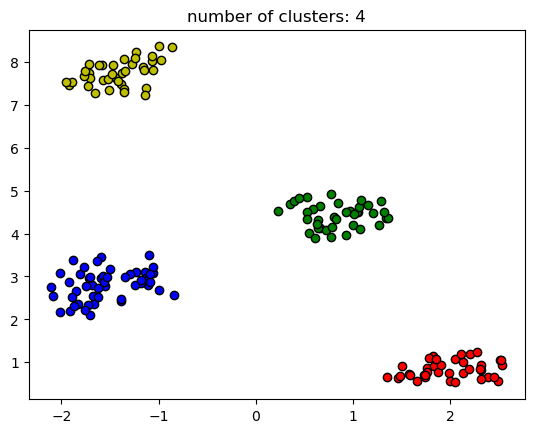

In [49]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
plt.title('number of clusters: %d' % n_clusters_)
plt.show()
  

In [43]:
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)



Silhouette Coefficient:0.13


# CONCLUSION

From the above three clusterings we got silhhouette score is maximum for k-means clustering. Hence k-means clustering model is best for wine dataset